# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


Jeremy Skoler     

In [5]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [41]:
# Here are the units we'll need

s = UNITS.second
days = UNITS.days
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [22]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 

init = State(x = r_0,
             y = 0 ,
            vx = 0 ,
            vy = -30330 )

,values
x,1.470000e+11
y,0.000000e+00
vx,0.000000e+00
vy,-3.033000e+04


In [23]:
# Making a system object

r_earth = 6.371e6
r_sun = 695.508e6

system = System(init=init,
                G=6.674e-11,
                m1=1.989e30,
                r_final=r_sun + r_earth,
                m2=5.972e24,
                t_0=0,
                t_end=31557600)

,values
init,x 1.470000e+11 y 0.000000e+00 vx 0....
G,6.674e-11
m1,1.989e+30
r_final,7.01879e+08
m2,5.972e+24
t_0,0
t_end,31557600


In [24]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    r = Vector(x,y)
    r_mag = r.mag
    
    force = G * m1 * m2 / r_mag**2
    
    
    a, b = pol2cart(-r.angle, force)
    Fvector = Vector (a, b)

    
    return Fvector

In [25]:
universal_gravitation(init, system)

<Quantity([ 3.6686486e+22 -0.0000000e+00], 'dimensionless')>

In [26]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    

    Fvector = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = -Fvector.x / m2
    dvydt = Fvector.y / m2
    
    return dxdt, dydt, dvxdt, dvydt

In [27]:
# Always test the slope function!

slope_func(init, 0, system) 

(0.0,
 -30330.0,
 <Quantity(-0.006143082049146188, 'dimensionless')>,
 <Quantity(-0.0, 'dimensionless')>)

In [66]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, method='RK23')
details


,values
sol,None
t_events,[]
nfev,137
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [67]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

# Scaling the results into Million Km
results.y /= 1e9
results.x /= 1e9

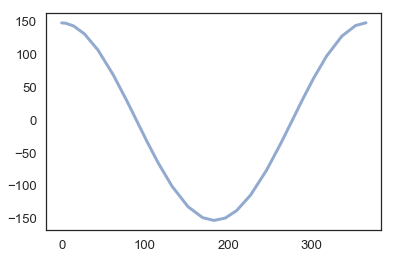

In [68]:
plot(results.x)


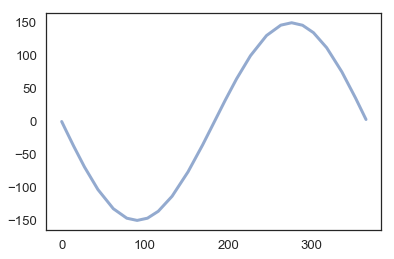

In [69]:
plot(results.y)

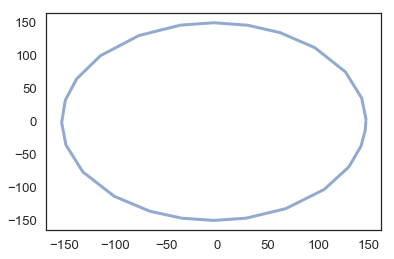

In [70]:
plot(results.x,results.y)

In [42]:
# Here's how long it takes...

t_final = get_last_label(results) * days

<Quantity(365.25, 'day')>

In [47]:
solve_ivp?


